# L2 - Geopandas

---

10 total points

Due: January 25th, 2026 at 11:59 p.m.

---

Directions:

1. Please rename the file by clicking on "LX-First-Last.ipynb" where X is the lab number, and replace First and Last with your first and last name.
2. Click File -> Save to make sure your most recent edits are saved.
3. In the upper right hand corner of the screen, click on "Share". Click on "Restricted" and change it to "Anyone with the link".
4. Copy the link and submit it on Blackboard. Make sure you follow these steps completely, or I will be unable to grade your work.

---

### Overview

This lab will help you understand Geopandas and its capabilities. We will walk through some examples of how geopandas can help solve Geoscience problems. Periodically, I will 1) ask you to either repeat the demonstrated code in a slightly different way; or 2) ask you to combine two or more techniques to solve a problem.

Please do not use generative AI to answer these problems. In one example, I provide generative AI code that "solves" a problem and ask you to tell me where it went wrong. It is crucial that you understand the code well enough to effectively use generative AI tools that are likely to be widely available and recommended for use at many organizations. Although they are improving at an incredible rate, they still produce bugs, especially with domain-specific and complex problems.

### Download

Make sure that you run the following commands to download the data used for this lab. This dataset includes all tornado warning and severe thunderstorm warning attribute, location, and metadata information for 2020 in the USA:

In [1]:
!mkdir warning_data
!cd warning_data && wget -nc https://mesonet.agron.iastate.edu/pickup/wwa/2020_tsmf_sbw.zip
!cd warning_data && unzip 2020_tsmf_sbw.zip

--2026-01-19 20:26:51--  https://mesonet.agron.iastate.edu/pickup/wwa/2020_tsmf_sbw.zip
Resolving mesonet.agron.iastate.edu (mesonet.agron.iastate.edu)... 129.186.90.1, 2610:130:108:480::81ba:5a01
Connecting to mesonet.agron.iastate.edu (mesonet.agron.iastate.edu)|129.186.90.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5261747 (5.0M) [application/zip]
Saving to: ‘2020_tsmf_sbw.zip’

2020_tsmf_sbw.zip   100%[===================>]   5.02M  5.48MB/s    in 0.9s    

2026-01-19 20:26:52 (5.48 MB/s) - ‘2020_tsmf_sbw.zip’ saved [5261747/5261747]

Archive:  2020_tsmf_sbw.zip
  inflating: wwa_202001010000_202012312359.shp  
  inflating: wwa_202001010000_202012312359.shx  
  inflating: wwa_202001010000_202012312359.dbf  
  inflating: wwa_202001010000_202012312359.prj  
  inflating: wwa_202001010000_202012312359.cpg  
  inflating: wwa_202001010000_202012312359.csv  


Install the required packages:

In [54]:
!pip install cartopy
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 76.3 MB/s eta 0:00:00


Geopandas can directly read shapefiles. To read in the data we just downloaded, run the following code:

In [2]:
import geopandas as gpd

warnings = gpd.read_file("warning_data/wwa_202001010000_202012312359.shp")

warnings.head()

,WFO,ISSUED,EXPIRED,INIT_ISS,INIT_EXP,PHENOM,GTYPE,SIG,ETN,STATUS,...,HV_REC,EMERGENC,POLY_BEG,POLY_END,WINDTAG,HAILTAG,TORNTAG,DAMAGTAG,PROD_ID,geometry
0,AMA,202005072219,202005072300,202005072219,202005072300,SV,P,W,19,NEW,...,None,False,202005072219,202005072230,60.0,1.00,None,None,202005072219-KAMA-WUUS54-SVRAMA,"POLYGON ((-100 34.75, -100.51 34.75, -100 34.9..."
1,BYZ,202007200136,202007200222,202007200136,202007200245,SV,P,W,60,NEW,...,None,False,202007200136,202007200203,60.0,1.25,None,None,202007200136-KBYZ-WUUS55-SVRBYZ,"POLYGON ((-104.5 45, -104.04 45.37, -104.04 45..."
2,LBF,202006050348,202006050430,202006050348,202006050430,SV,P,W,63,NEW,...,None,False,202006050348,202006050413,60.0,1.50,None,None,202006050348-KLBF-WUUS53-SVRLBF,"POLYGON ((-100.57 42.67, -100.95 42.99, -100.2..."
3,GRB,202008250244,202008250315,202008250244,202008250315,SV,P,W,63,NEW,...,None,False,202008250244,202008250256,60.0,1.00,None,None,202008250244-KGRB-WUUS53-SVRGRB,"POLYGON ((-90.07 44.37, -89.74 44.25, -90.17 4..."
4,UNR,202008112203,202008112245,202008112203,202008112245,SV,P,W,364,NEW,...,None,False,202008112203,202008112217,60.0,1.25,None,None,202008112203-KUNR-WUUS53-SVRUNR,"POLYGON ((-103.07 43.31, -102.54 43, -103.25 4..."


## Problem 1

You are tasked with visualizing the warning polygons associated with the derecho event of 2020 in Illinois. The first step is to subset the ~28,000 rows so that you are only working with data that overlaps your period of interest.

Use the ```.columns``` property to examine what columns are available for filtering purposes:


In [3]:
warnings.columns

Index(['WFO', 'ISSUED', 'EXPIRED', 'INIT_ISS', 'INIT_EXP', 'PHENOM', 'GTYPE',
       'SIG', 'ETN', 'STATUS', 'NWS_UGC', 'AREA_KM2', 'UPDATED', 'HV_NWSLI',
       'HV_SEV', 'HV_CAUSE', 'HV_REC', 'EMERGENC', 'POLY_BEG', 'POLY_END',
       'WINDTAG', 'HAILTAG', 'TORNTAG', 'DAMAGTAG', 'PROD_ID', 'geometry'],
      dtype='object')

The ```ISSUED``` column is the time that the warning was first produced and sent by the local NWS station. We can examine just this column using column header indexing. We see that the date and time is formatted as such:

```
202005072219 -> YYYYMMDDHHmm
```

We could use string indexing to extract dates and times from this string, but it is easier just to turn it into a datetime object.

In [4]:
warnings['ISSUED'].head()

,ISSUED
0,202005072219
1,202007200136
2,202006050348
3,202008250244
4,202008112203


One way to do this is to use the pandas method ```to_datetime``` which can handle many datetime string formats withoput much effort. If you scroll all the way to the right below, you can see a new column named ```ISSUED_DT``` that contains a formated date:

In [15]:
import pandas as pd

warnings['ISSUED_DT'] = pd.to_datetime(warnings['ISSUED'])

warnings.head()

,WFO,ISSUED,EXPIRED,INIT_ISS,INIT_EXP,PHENOM,GTYPE,SIG,ETN,STATUS,...,EMERGENC,POLY_BEG,POLY_END,WINDTAG,HAILTAG,TORNTAG,DAMAGTAG,PROD_ID,geometry,ISSUED_DT
0,AMA,202005072219,202005072300,202005072219,202005072300,SV,P,W,19,NEW,...,False,202005072219,202005072230,60.0,1.00,None,None,202005072219-KAMA-WUUS54-SVRAMA,"POLYGON ((-100 34.75, -100.51 34.75, -100 34.9...",2020-05-07 22:19:00
1,BYZ,202007200136,202007200222,202007200136,202007200245,SV,P,W,60,NEW,...,False,202007200136,202007200203,60.0,1.25,None,None,202007200136-KBYZ-WUUS55-SVRBYZ,"POLYGON ((-104.5 45, -104.04 45.37, -104.04 45...",2020-07-20 01:36:00
2,LBF,202006050348,202006050430,202006050348,202006050430,SV,P,W,63,NEW,...,False,202006050348,202006050413,60.0,1.50,None,None,202006050348-KLBF-WUUS53-SVRLBF,"POLYGON ((-100.57 42.67, -100.95 42.99, -100.2...",2020-06-05 03:48:00
3,GRB,202008250244,202008250315,202008250244,202008250315,SV,P,W,63,NEW,...,False,202008250244,202008250256,60.0,1.00,None,None,202008250244-KGRB-WUUS53-SVRGRB,"POLYGON ((-90.07 44.37, -89.74 44.25, -90.17 4...",2020-08-25 02:44:00
4,UNR,202008112203,202008112245,202008112203,202008112245,SV,P,W,364,NEW,...,False,202008112203,202008112217,60.0,1.25,None,None,202008112203-KUNR-WUUS53-SVRUNR,"POLYGON ((-103.07 43.31, -102.54 43, -103.25 4...",2020-08-11 22:03:00


This is very useful for us because we can access datetime methods by accessing the column via column indexing, accessing the ```dt``` (datetime) property for each row, and then access the properties: ```year```, ```month```, ```day```, ```hour```, ```minute```, etc.

Below is an example of using this approach to print out all of the months for each row:

In [16]:
print(warnings['ISSUED_DT'].dt.month)

0        5
1        7
2        6
3        8
4        8
        ..
28026    2
28027    5
28028    4
28029    5
28030    5
Name: ISSUED_DT, Length: 28031, dtype: int32


We can even do statistics on these properties. As we discussed in Chapter 6, ```value_counts``` is a very useful method that counts how often a unique value occurs (e.g., a month ```int```) and then provides a sorted, descending list of the frequencies.

```7``` showed up the most (nearly 6000 times), which suggests that July was the most active month from a warning issuance perspective:

In [17]:
warnings['ISSUED_DT'].dt.month.value_counts()

,count
ISSUED_DT,
7,5844
8,5018
6,4572
5,3686
4,3313
3,1432
9,1166
1,818
11,678


We can examine the breakdown of each type of warning throughout the year. We are most interested in:

1. ```SV``` (severe thunderstorm warning); and
2. ```TO``` (tornado warning):

In [18]:
warnings['PHENOM'].value_counts()

,count
PHENOM,
SV,17439
MA,5597
FF,2874
TO,2121


### Problem 1a

Use pandas filtering on the ```warning``` GeoDataFrame to compare monthly counts of tornado warnings and severe thunderstorm warnings.


### Problem 1b

1. Use external sources to determine generally when the derecho moved through Illinois (date and hour range).

2. Use the image archive tool to examine radar loops from that time. If you correctly fill in the variables below, the resulting link should bring you to an animation on the Iowa State Mesonet page. NOTE: These are UTC times (add 5 hours to central time in August).

In [29]:
### Change these to match the time you want to examine
year = 2020
month = 12
day = 31
hour = 23
minute = 45

### Do not change below
prefix = "https://mesonet.agron.iastate.edu/current/mcview.phtml?prod=lotrad&java=script&mode=archive&frames=13&interval=5"
time_str = f"&year={year}&month={month}&day={day}&hour={hour}&minute={minute}"

print(prefix + time_str)

https://mesonet.agron.iastate.edu/current/mcview.phtml?prod=lotrad&java=script&mode=archive&frames=13&interval=5&year=2020&month=12&day=31&hour=23&minute=45


### Problem 1c

Based on you manual assessment of the radar animation, use ```ISSUED_DT``` to filter ```warnings``` for rows that are **within the time range** of the derecho passing through **Illinois** and are **tornado or severe thunderstorm warnings**. Set the result to a new variable named ```warn_derecho```.

datetime.datetime takes the arguments year, month, day, hour, and minute in order.

In [52]:
import datetime

start_date = datetime.datetime(2020, 1, 1, 0, 1)
end_date = datetime.datetime(2020, 12, 31, 23, 45)

warn_derecho = warnings

warn_derecho

,WFO,ISSUED,EXPIRED,INIT_ISS,INIT_EXP,PHENOM,GTYPE,SIG,ETN,STATUS,...,EMERGENC,POLY_BEG,POLY_END,WINDTAG,HAILTAG,TORNTAG,DAMAGTAG,PROD_ID,geometry,ISSUED_DT
0,AMA,202005072219,202005072300,202005072219,202005072300,SV,P,W,19,NEW,...,False,202005072219,202005072230,60.0,1.00,None,None,202005072219-KAMA-WUUS54-SVRAMA,"POLYGON ((-100 34.75, -100.51 34.75, -100 34.9...",2020-05-07 22:19:00
1,BYZ,202007200136,202007200222,202007200136,202007200245,SV,P,W,60,NEW,...,False,202007200136,202007200203,60.0,1.25,None,None,202007200136-KBYZ-WUUS55-SVRBYZ,"POLYGON ((-104.5 45, -104.04 45.37, -104.04 45...",2020-07-20 01:36:00
2,LBF,202006050348,202006050430,202006050348,202006050430,SV,P,W,63,NEW,...,False,202006050348,202006050413,60.0,1.50,None,None,202006050348-KLBF-WUUS53-SVRLBF,"POLYGON ((-100.57 42.67, -100.95 42.99, -100.2...",2020-06-05 03:48:00
3,GRB,202008250244,202008250315,202008250244,202008250315,SV,P,W,63,NEW,...,False,202008250244,202008250256,60.0,1.00,None,None,202008250244-KGRB-WUUS53-SVRGRB,"POLYGON ((-90.07 44.37, -89.74 44.25, -90.17 4...",2020-08-25 02:44:00
4,UNR,202008112203,202008112245,202008112203,202008112245,SV,P,W,364,NEW,...,False,202008112203,202008112217,60.0,1.25,None,None,202008112203-KUNR-WUUS53-SVRUNR,"POLYGON ((-103.07 43.31, -102.54 43, -103.25 4...",2020-08-11 22:03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28026,JAN,202002102044,202002102345,202002102044,202002102345,FF,P,W,41,NEW,...,False,202002102044,202002102345,NaN,NaN,None,None,202002102044-KJAN-WGUS54-FFWJAN,"POLYGON ((-91.84 32.89, -91.17 33, -91.21 32.9...",2020-02-10 20:44:00
28027,OUN,202005230501,202005230600,202005230501,202005230600,SV,P,W,367,NEW,...,False,202005230501,202005230548,60.0,0.75,None,None,202005230501-KOUN-WUUS54-SVROUN,"POLYGON ((-95.84 33.83, -95.93 33.89, -96.14 3...",2020-05-23 05:01:00
28028,TSA,202004222359,202004230100,202004222359,202004230100,SV,P,W,83,NEW,...,False,202004222359,202004230027,60.0,1.00,None,None,202004222359-KTSA-WUUS54-SVRTSA,"POLYGON ((-95.84 33.87, -95.88 33.91, -95.91 3...",2020-04-22 23:59:00
28029,TSA,202005230601,202005230645,202005230601,202005230645,SV,P,W,223,NEW,...,False,202005230601,202005230628,70.0,1.00,None,None,202005230601-KTSA-WUUS54-SVRTSA,"POLYGON ((-95.84 33.87, -95.88 33.91, -95.91 3...",2020-05-23 06:01:00


### Problem 1d

Verify that your date range is correct by printing out the ```max``` and ```min``` times within the subset's ```ISSUED_DT```.

Why might these not match the bounds you specified above (ANSWER IN MARKDOWN)?

Answer:

In [28]:
### change variable from warnings to warn_derecho
print("minimum time is: ", warn_derecho['ISSUED_DT'].min())

### change variable from warnings to warn_derecho
print("maximum time is: ", warn_derecho['ISSUED_DT'].max())

minimum time is:  2020-01-02 20:41:00
maximum time is:  2020-12-31 21:52:00


## Problem 2

Considering your map project is an important part of any analysis that includes spatial data types. We can examine the projection information associated with the shapefile we read in earlier by using the ```crs``` property:

In [32]:
warn_derecho.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The coordinate system and mapping information associated with the warnings is the basic "latitude / longitude". This is very convenient for sharing data and long-term file storage, but it can cause inconsistencies in your analysis.

For example, let's look at the area of the qualifying warnings by using the ```area``` property in the GeoDataFrame. This is based on the shapely property that is built-in to spatial data types that have areas (e.g., polygons, etc.).

You will notice that you have a warning that tells you, basically, to not trust the area that is returned! These areas are very small because they are "square degrees".

In [33]:
warn_derecho.area

/tmp/ipython-input-1819352967.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warn_derecho.area


,0
0,0.05865
1,0.08510
2,0.11680
3,0.02580
4,0.11005
...,...
28026,0.32595
28027,0.35215
28028,0.21500
28029,0.13715


```geopandas``` also has a solution to this issue. There is a method called ```to_crs``` that will automatically convert your geometry between coordinate systems.

The easiest way to perform this task is to find an appropriate projection code. This website is useful for getting many of the most common, non-custom, projection codes: https://epsg.io/

Typically, if we are trying to calculate area, we want what is called an "equal area" projection. For the US, there are two popular choices:

1. USGS Contiguous USA Albers Equal Area (```EPSG:5070```; units = meters)
2. UTM 16 N (if examining Illinois or states directly North or South; ```EPSG:26916```; units = meters)

A "USA Albers Equal Area" is a good general use projection for the USA. UTM 16 N is only good for specific states, however, it is more accurate than the general USA equal area (2.0 m accuracy).

Let's choose the USA version and perform the projection below.

NOTE: this will have no impact on your attribute columns, just the geometry columns and the spatial properties of the GeoDataFrame.

In [50]:
# make sure your GeoDataFrame has a projection
print("initial proj code:", warn_derecho.crs.to_epsg())

# use to_crs to convert to "ESRI:102039"
warn_derecho_proj = warn_derecho.to_crs("EPSG:5070")

# examine new code to make sure the projection worked:
print("new proj code:", warn_derecho_proj.crs.to_epsg())

# convert to sq. km (1 sq. km = 1e6 sq. m)
warn_derecho_proj['area_albers_sqm'] = warn_derecho_proj.area
warn_derecho_proj['area_albers_sqkm'] = warn_derecho_proj['area_albers_sqm'] / 1e6

# print out the new areas
display(warn_derecho_proj[['area_albers_sqm', 'area_albers_sqkm']])

initial proj code: 4326
new proj code: 5070


,area_albers_sqm,area_albers_sqkm
0,5.958271e+08,595.827118
1,7.453453e+08,745.345279
2,1.060147e+09,1060.146820
3,2.287039e+08,228.703936
4,9.954794e+08,995.479395
...,...,...
28026,3.389840e+09,3389.840473
28027,3.611620e+09,3611.620031
28028,2.202751e+09,2202.750551
28029,1.405358e+09,1405.357909


### Problem 2a

Compare the area differences in sq. km between albers and UTM by projecting to UTM and creating a new column. Display both columns as demonstrated above.

### Problem 2b

Find the mean size (in sq. km) of the warnings during the period you are examining. What is the size of DeKalb County? Do your results make sense?

### Problem 2c

Compare the mean size of tornado warnings and severe thunderstorm warnings. Which are bigger on average?

### Problem 2d

Run another area analysis that you find interesting or are curious about. Explain your approach in the markdown and interpret the results.

## Problem 3

Plotting geometry on a ```cartopy``` map is relatively straightforward. The only tricky part can be handling projections.

For simplicity, we are going to use the filtered but lat/lon version of the GeoDataFrame ```warn_derecho```.

We will use ```cartopy``` to map the warning data.

Making a simple cartopy map only takes a few lines of code. We will talk more about mapping in future labs, but here are the basics:

```import cartopy.crs as ccrs```: ```ccrs``` handles all of the projection duties

```import cartopy.feature as cfeature```: ```cfeature``` handles convenient methods to plot common boundaries (US States, etc.).

These two imports will be included in most, if not all, of your code that involves ```cartopy``` mapping.

The code below:

1. Sets the **map** projection to lat/lon (```projection=ccrs.PlateCarree()```)
2. Adds US states to the map ```ax.add_feature(cfeature.STATES)```
3. Sets the map extent to areas centered on Illinois.

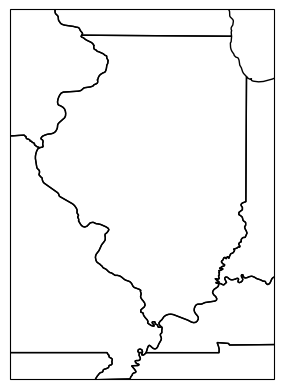

In [64]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent([-92, -87, 36, 43])

ax.add_feature(cfeature.STATES)

### Problem 3a

The ```add_geometries``` method can add any geometry with geographic information to the map. This function takes a **list or numpy array** of geometries. Create a polygon that would be within Illinois based on its lat/lon coordinates.

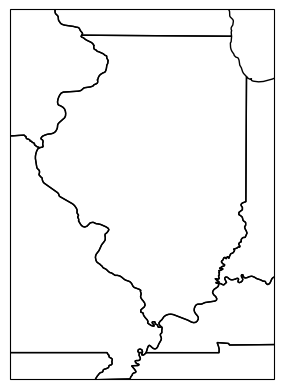

In [73]:
from shapely.geometry import Polygon

poly = Polygon([(1,1), (1,1), (1,1), (1,1)])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent([-92, -87, 36, 43])

ax.add_feature(cfeature.STATES)

ax.add_geometries([poly], crs=ccrs.PlateCarree(), color='red')

### Problem 3b

Remove two instances of ```.sample(100)``` from the code below once you determine the correct subset for ```warn_derecho``` in Problem 1c.

Modify the following code so the **tornado warnings** are red and **severe thunderstorm warnings** are yellow in your 2020 derecho subset.

<GeoAxes: >

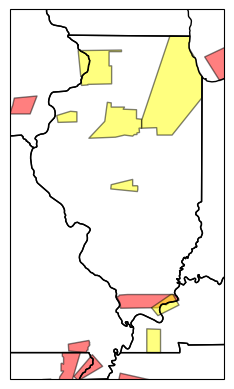

In [103]:
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent([-92, -87, 36, 43])

ax.add_feature(cfeature.STATES)

warn_derecho.sample(100).plot(ax=ax, alpha=0.5, facecolor='red', edgecolor='black')

warn_derecho.sample(100).plot(ax=ax, alpha=0.5, facecolor='yellow', edgecolor='black')